# 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sns
sns.set()

Importing the stock data

In [17]:
#import fix_yahoo_finance as yf
amzn = yf.pdr_override('AMZN',period='5y')

[*********************100%***********************]  1 of 1 completed


In [18]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-22,64.858498,66.372498,64.833000,66.365501,66.365501,82802000
2018-01-23,66.904503,68.245003,66.866997,68.126999,68.126999,103386000
2018-01-24,68.740997,69.407997,66.900002,67.875504,67.875504,136150000
2018-01-25,68.400002,68.917000,67.880997,68.897499,68.897499,95060000
2018-01-26,69.600502,70.126503,69.045502,70.102501,70.102501,97146000


# Instantaneous rate of return

In [19]:
amzn_return = round(np.log(amzn.Close).diff()*100,2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
2018-01-23    2.62
2018-01-24   -0.37
2018-01-25    1.49
2018-01-26    1.73
2018-01-29    1.11
Name: Close, dtype: float64

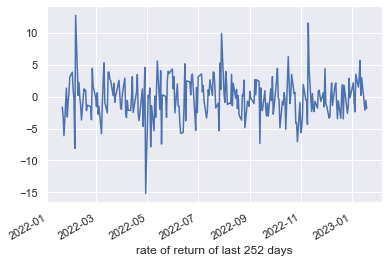

In [23]:
## Ploting the rate of return series
amzn_return[-252:].plot(xlabel = 'rate of return of last 252 days');


In [24]:
##Descriptive statistics of return series
amzn_return.describe()

count    1257.000000
mean        0.027462
std         2.268260
min       -15.140000
25%        -1.080000
50%         0.120000
75%         1.170000
max        12.690000
Name: Close, dtype: float64

In [25]:
##Descriptive statistics from scipy
from scipy import stats

In [26]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

For comparision generate random numbers that follow normal distribution

In [31]:
from scipy.stats import norm

In [32]:
x = norm.rvs(mean,std,n)

In [34]:
stats.describe(x)

DescribeResult(nobs=1257, minmax=(-8.988386869279916, 6.9307275478251915), mean=-0.0490498583020088, variance=4.949519273736353, skewness=-0.03590213566406534, kurtosis=0.21031861270206686)

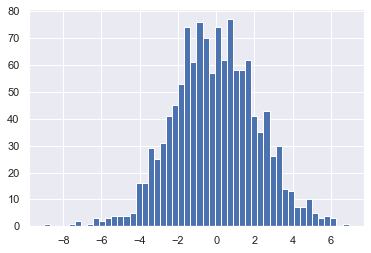

In [42]:
plt.hist(x,bins = 50);

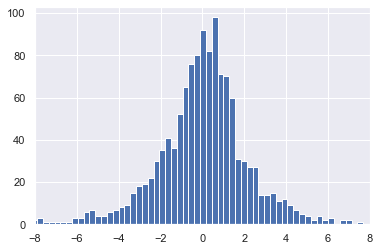

In [53]:
## Focusing of data points between -8 to 8
plt.hist(amzn_return, bins = 100)
plt.xlim(-8,8);

Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [54]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             1.50          0.1349
AMZN:         11.07          0.0000


# plot histogram of price changes with normal curve overlay

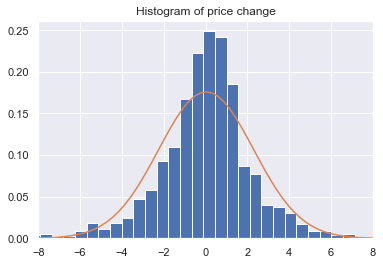

In [59]:
plt.hist(amzn_return, bins = 50, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std))
plt.xlim(-8,8)
plt.title('Histogram of price change');

# Compare normally distributed sample with same attributes as amzn price change

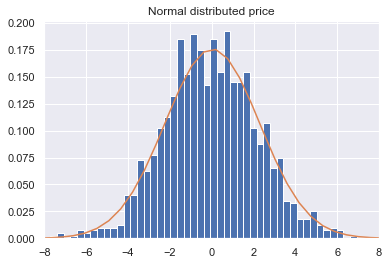

In [67]:
plt.hist(x,bins = 50, density = True)
b = np.linspace(mini,maxi,50)
plt.plot(b,stats.norm.pdf(b,mean,std))
plt.xlim(-8,8)
plt.title('Normal distributed price');

Hypothesis test: hypothesis : is daily price change significantly different from zero?

In [72]:
stats.ttest_1samp(amzn_return.sample(252),0)

Ttest_1sampResult(statistic=1.1773080731525478, pvalue=0.2401877163472485)

Creating price lags

In [74]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2018-01-24,67.875504,68.126999,66.365501
2018-01-25,68.897499,67.875504,68.126999
2018-01-26,70.102501,68.897499,67.875504
2018-01-29,70.884003,70.102501,68.897499
2018-01-30,71.890999,70.884003,70.102501


# Fitting linear model

In [76]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond = None)[0]
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)
amzn_close.head()                     

,Close,lag_1,lag_2,predict
Date,,,,
2018-01-24,67.875504,68.126999,66.365501,68.084791
2018-01-25,68.897499,67.875504,68.126999,67.871588
2018-01-26,70.102501,68.897499,67.875504,68.869248
2018-01-29,70.884003,70.102501,68.897499,70.070617
2018-01-30,71.890999,70.884003,70.102501,70.860068


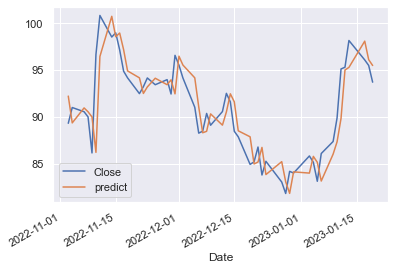

In [79]:
amzn_close.iloc[-52:][['Close', 'predict']].plot();